In [40]:
import math
import torch
from torch import nn
import torch.functional as F
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [5]:
# Autograd - Automatic differentiation engine in Pytorch
a = torch.linspace(-2 * math.pi, 2 * math.pi, steps=100, requires_grad=True)
print(a.size())

torch.Size([100])


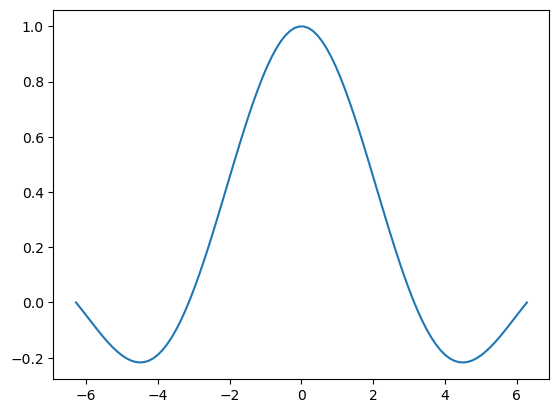

In [6]:
b = torch.sin(a) / a
b.retain_grad()
plt.plot(a.detach(),b.detach())

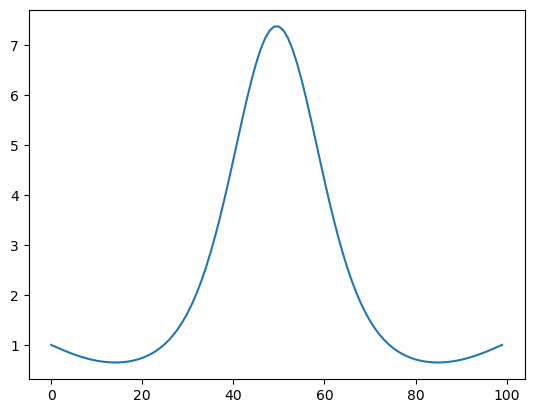

In [7]:
c = 2 * b
c.retain_grad()
d = torch.exp(c)
d.retain_grad()
plt.plot(d.detach())

In [8]:
out = d.sum()
out.retain_grad()
print(out)

tensor(232.9981, grad_fn=<SumBackward0>)


In [9]:
out.backward()

In [10]:
out.grad

tensor(1.)

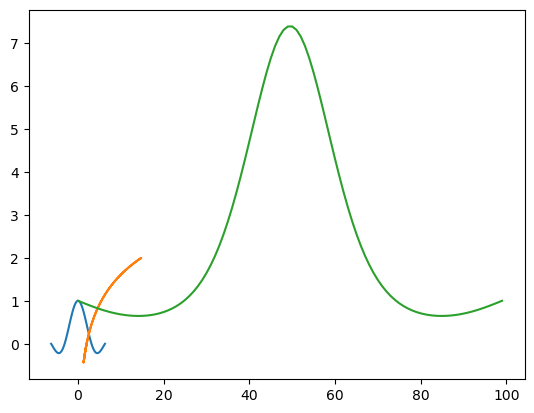

In [16]:
plt.plot( a.detach(), b.detach(), b.grad.detach(), c.detach(), c.grad.detach())


In [21]:
print(d.grad_fn)
print(c.grad_fn)
print(b.grad_fn)
print(a.grad_fn)

None


tensor(108.5000, grad_fn=<SumBackward0>)


tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

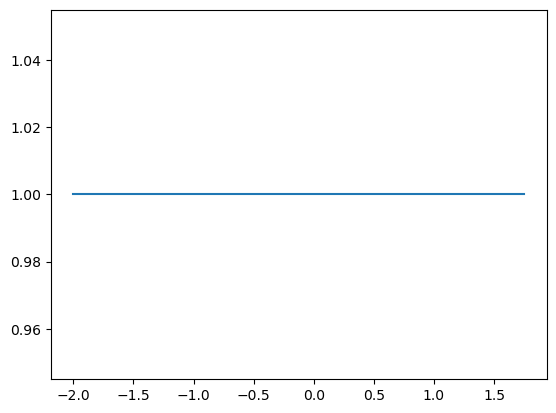

In [49]:
def f(x):
    return 3*x**2 -6*x + 2
xs = torch.arange(-2, 2, 0.25, requires_grad=True)
ys = f(xs)
ys.retain_grad()
out = torch.sum(ys)
print(out)
out.backward()
plt.plot(xs.detach(), ys.grad.detach())
ys.grad.detach()